In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Gaussian1():
    return np.random.normal(0,1)
def Gaussian2():
    return np.random.normal(1,np.sqrt(2))
def Poisson():
    return np.random.poisson(2,None)
def Coin_Toss():
    toss = np.random.randint(0, 2)  # 0 or 1
    if toss == 1:
        return 3
    else:
        return -4
def Exponential():
    return np.random.exponential(1)
def Surprise():
    x = np.random.randint(1, 6)  
    if(x==1):
        return Gaussian1()
    elif (x==2):
        return Gaussian2()
    elif (x==3):
        return Poisson()
    elif (x==4):
        return Coin_Toss()
    elif (x==5):
        return Exponential()

def Epsilon(epsilon, Q):
    if np.random.rand() <= epsilon:
        action = np.random.randint(0, 6)  
    else:
        greedy_actions = np.where(Q == np.max(Q))[0]
        if len(greedy_actions) == 0:
            action = np.random.randint(0, 6) 
        else:
            action = np.random.choice(greedy_actions)
    return action    

In [30]:
buttons=[Gaussian1, Gaussian2, Poisson, Coin_Toss, Exponential, Surprise]
epsilons=[0, 0.01, 0.1]
avg_timestep_rewards_epsilon_0 = np.zeros(1000)
avg_timestep_rewards_epsilon_01 = np.zeros(1000)
avg_timestep_rewards_epsilon_1 = np.zeros(1000)

for epsilon,rewards in zip(epsilons, [avg_timestep_rewards_epsilon_0, avg_timestep_rewards_epsilon_01, avg_timestep_rewards_epsilon_1]):
    Q = np.zeros((6,1000))
    N = np.zeros((6,1000))
    for i in range(1000):   
        total_reward = 0
        for j in range(1000):
            action = Epsilon(epsilon, Q[:,j])
            reward = buttons[action]()
            N[action][j] += 1
            Q[action][j] += (reward - Q[action][j]) / N[action][j]
            total_reward += reward
        rewards[i] = total_reward/1000


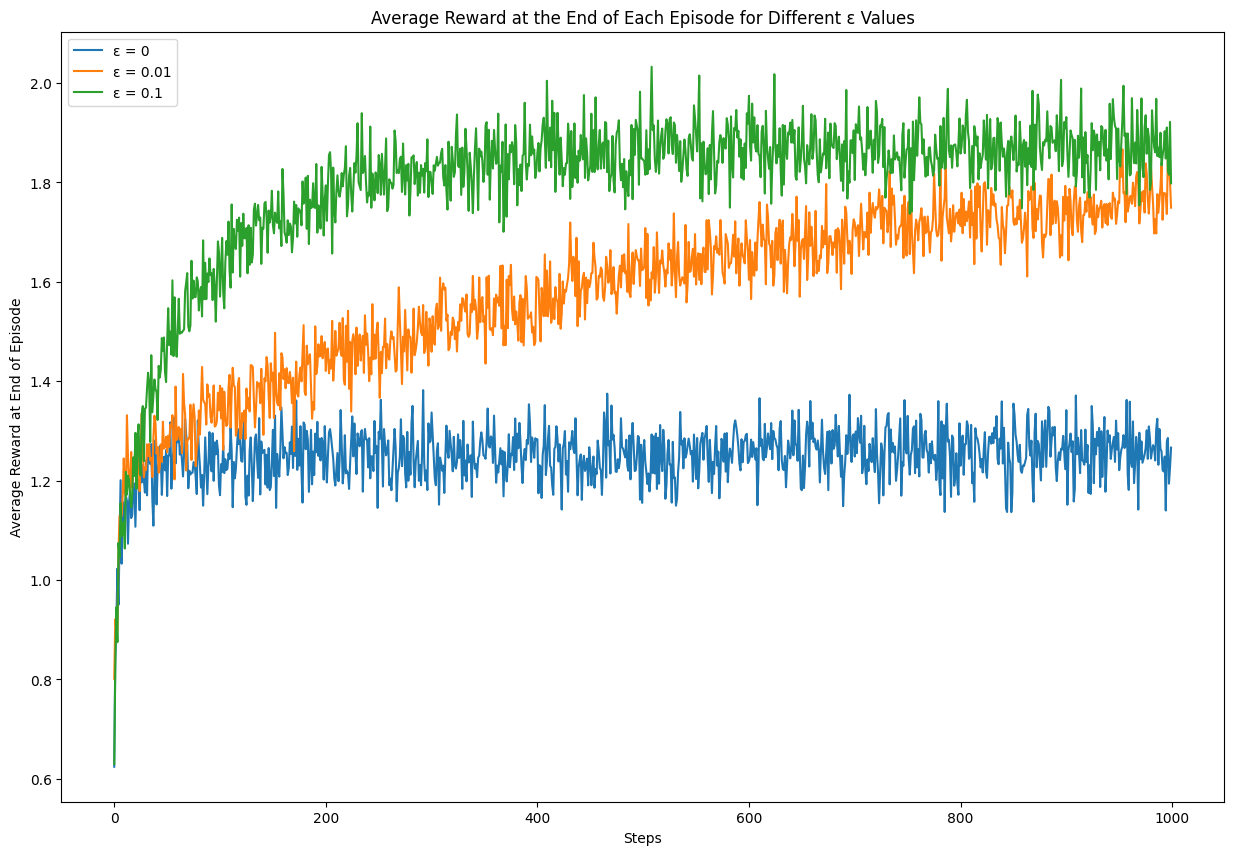

In [31]:
plt.figure(figsize=(15, 10))
plt.plot(avg_timestep_rewards_epsilon_0, label='ε = 0')
plt.plot(avg_timestep_rewards_epsilon_01, label='ε = 0.01')
plt.plot(avg_timestep_rewards_epsilon_1, label='ε = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average Reward at End of Episode')
plt.title('Average Reward at the End of Each Episode for Different ε Values')
plt.legend()
plt.show()
